<a href="https://colab.research.google.com/github/OlgaS16/Jupyter_Notebook/blob/main/Interactive_linguistic_essay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I scrape the Wikipedia page about **Computer Security** and perform a basic linguistic analysis using Python libraries such as *BeautifulSoup*, *NLTK*, and *matplotlib*. The idea behind this project is to explore how language works in a formal, technical context by looking at the vocabulary, grammar, and structure used in online cybersecurity-related content.

To do this, I first collect real-world data through web scraping, then preprocess and tokenize the text using natural language processing tools. After that, I analyze word frequency and grammatical categories to understand how information is structured in this type of writing. I also visualize language patterns using charts and graphs to make the findings clearer and more engaging.

By the end, I hope to get a clearer picture of the kinds of words and sentence structures that dominate cybersecurity-related writing.

In [ ]:
from IPython.display import Image, display

display(Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Hacker_behind_PC.svg/800px-Hacker_behind_PC.svg.png", width=400))

Here I use *requests* and *BeautifulSoup* to grab the main content from the Wikipedia page on **Computer Security**. I extract all the `<p>` tags, which contain the actual article paragraphs.

In [43]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Computer_security"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

paragraphs = soup.find_all('p')
text = ' '.join([p.get_text() for p in paragraphs])
print(text[:1000])


 Computer security (also cybersecurity, digital security, or information technology (IT) security) is a subdiscipline within the field of information security. It consists of the protection of computer software, systems and networks from threats that can lead to unauthorized information disclosure, theft or damage to hardware, software, or data, as well as from the disruption or misdirection of the services they provide.[1][2]
 The significance of the field stems from the expanded reliance on computer systems, the Internet,[3] and wireless network standards. Its importance is further amplified by the growth of smart devices, including smartphones, televisions, and the various devices that constitute the Internet of things (IoT). Cybersecurity has emerged as one of the most significant new challenges facing the contemporary world, due to both the complexity of information systems and the societies they support. Security is particularly crucial for systems that govern large-scale system

Now I clean the scraped text by:
- Tokenizing it
- Lowercasing everything
- Removing punctuation and common stopwords

This helps us focus on the important words that actually tell us something about the topic.

In [44]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

tokens = word_tokenize(text)
words = [word.lower() for word in tokens if word.isalpha()]
filtered_words = [w for w in words if w not in stopwords.words('english')]

print(filtered_words[:20])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['computer', 'security', 'also', 'cybersecurity', 'digital', 'security', 'information', 'technology', 'security', 'subdiscipline', 'within', 'field', 'information', 'security', 'consists', 'protection', 'computer', 'software', 'systems', 'networks']


Here I use NLTK’s *FreqDist* to find the most frequent content words in the article. These are likely to be technical terms related to cybersecurity, which shows how formal writing leans on domain-specific language.

We also plot the top 30 with *matplotlib*.

<Axes: title={'center': "Top 30 Most Frequent Words in 'Computer Security'"}, xlabel='Samples', ylabel='Counts'>

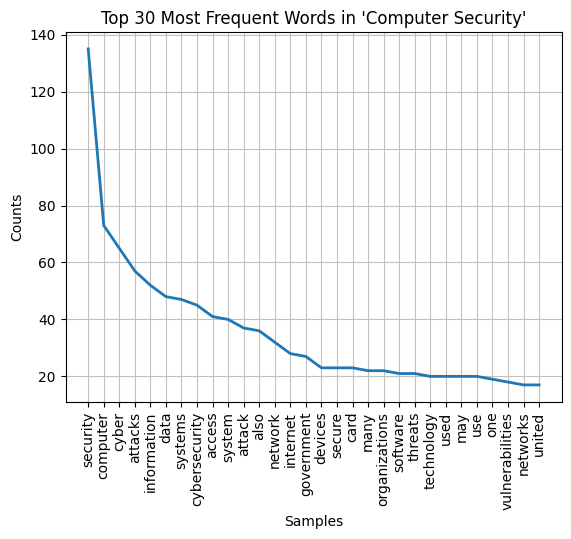

In [51]:
from nltk import FreqDist
import matplotlib.pyplot as plt

fdist = FreqDist(filtered_words)
fdist.plot(30, title="Top 30 Most Frequent Words in 'Computer Security'")


Below is an interactive chart that allows the reader to adjust the number of most frequent words displayed. By using the slider, one can explore how word frequency distribution shifts depending on how many top terms are visualized.

In [59]:
import ipywidgets as widgets
from IPython.display import display

def show_top_words(n):
    fdist.plot(n, title=f"Top {n} Most Frequent Words in 'Computer Security'")

widgets.interact(show_top_words, n=widgets.IntSlider(min=5, max=100, step=5, value=45));

interactive(children=(IntSlider(value=45, description='n', min=5, step=5), Output()), _dom_classes=('widget-in…

Next, I use *nltk.pos_tag()* to tag each word with its part of speech. This lets me see whether the article relies more on nouns (things), verbs (actions), adjectives (descriptions), etc.

I then count and visualize the most common POS tags.

In [52]:
nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(filtered_words)
tagged[:10]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('computer', 'NN'),
 ('security', 'NN'),
 ('also', 'RB'),
 ('cybersecurity', 'NN'),
 ('digital', 'JJ'),
 ('security', 'NN'),
 ('information', 'NN'),
 ('technology', 'NN'),
 ('security', 'NN'),
 ('subdiscipline', 'NN')]

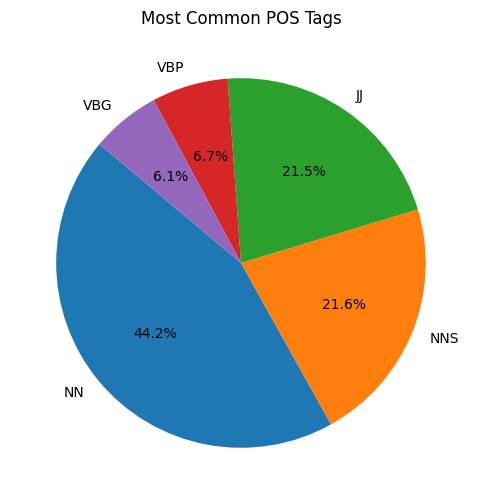

In [53]:
from collections import Counter

pos_counts = Counter(tag for word, tag in tagged)
common_tags = pos_counts.most_common(5)

# Convert to a plot-friendly format
labels, counts = zip(*common_tags)
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Most Common POS Tags")
plt.show()


As expected, the article containts a lot of nouns, like **“attack”, “security”, “system”** — these carry most of the meaning. It also uses a fair amount of adjectives (like **“unauthorized”** or **“malicious”**) to describe threats and protections. Verbs are present but less dominant — technical writing tends to be more descriptive than action-based.

This project helped me better understand the way technical language is used in written texts. I noticed that Wikipedia articles like this one rely heavily on **nouns** and **technical terms**, which makes sense since the goal is to inform and explain rather than entertain. Once the text was cleaned and processed, it became much easier to see patterns and identify the core vocabulary used throughout the article. Working with tools like *BeautifulSoup, NLTK*, and *matplotlib* showed me how well they complement each other—together, they made it possible to turn messy web data into something structured and visual. I also learned how to use *ipywidgets* to add interactive elements to the notebook, which made the whole analysis more dynamic and engaging.